# Klasyfikator Decision Tree

Import niezbędnych bibliotek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
from decision_regions import plot_decision_regions, plot_decision_regions1d
from sklearn.svm import SVC

In [2]:
# Wczytanie zbioru danych
dane = pd.read_csv('data.csv')

In [3]:
def klasyfikacja_granica(kolumny, cecha1, cecha2):
    X_dane = dane.iloc[:, kolumny]

    X = np.array(X_dane)

    # Klasa plec
    y_dane = dane.iloc[:,[2]]
    y = np.array(y_dane)

    #Podzial na zbior uczacy i testowy
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.50, random_state=42)

    # Utworzenie modelu klasyfikatora
    clf = tree.DecisionTreeClassifier()

    # Uczenie klasyfikatora
    clf = clf.fit(X_train, y_train)

    # Predykcja
    y_pred = clf.predict(X_test)

    # Dokladnosc predykcji
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy: %.4f' % acc)

    # Macierz konfuzji
    plt.figure(figsize = (5, 5))
    data = {'etykieta rzeczywista': y_test.ravel(), 'predykcja': y_pred.ravel()}
    df = pd.DataFrame(data, columns=['etykieta rzeczywista', 'predykcja'])
    confusion_mat = pd.crosstab(df['etykieta rzeczywista'], df['predykcja'], rownames=['etykieta rzeczywista'], colnames=['predykcja'])
    sns.heatmap(confusion_mat, annot = True, cmap = "viridis")
    plt.show()

    # Macierz konfuzji
    print("Macierz konfuzji:")
    print(confusion_matrix(y_test, y_pred))
    # Raport klasyfikacji
    print('report')
    print(classification_report(y_test, y_pred))

    # granica decyzyjna
    ind1=np.where(y_test == 1)
    ind2=np.where(y_test == 0)
    ax = plt.subplot()
    plt.scatter(X_test[ind1,0], X_test[ind1,1], edgecolor='black', label='kobieta')
    plt.scatter(X_test[ind2,0], X_test[ind2,1], edgecolor='black', label='mężczyzna')

    plot_decision_regions(X_test, y_test, clf)
    ax.set_xlim(X_test[:,0].min(), X_test[:,0].max())
    ax.set_ylim(X_test[:,1].min(), X_test[:,1].max())
    ax.set_xlabel(cecha1, fontsize = 14)
    ax.set_ylabel(cecha2, fontsize = 14)
    ax.tick_params(axis='both', labelsize=14)
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
    ncol=3, mode="expand", borderaxespad=0., edgecolor = 'black', fontsize = 14)
    ax.grid(True)
    ax.set_axisbelow(True)
    plt.tight_layout()
    plt.show()

    # rysowanie krzywej roc
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, 'b', label = 'AUC = %.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.grid()
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return acc

In [4]:
def klasyfikacja(kolumny):
    X_dane = dane.iloc[:, kolumny]

    X = np.array(X_dane)

    # Klasa plec
    y_dane = dane.iloc[:,[2]]
    y = np.array(y_dane)

    #Podzial na zbior uczacy i testowy
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.50, random_state=42)

    # Utworzenie modelu klasyfikatora
    clf = tree.DecisionTreeClassifier()

    # Uczenie klasyfikatora
    clf = clf.fit(X_train, y_train)

    # Predykcja
    y_pred = clf.predict(X_test)

    # Dokladnosc predykcji
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy: %.4f' % acc)

    # Macierz konfuzji
    plt.figure(figsize = (5, 5))
    data = {'etykieta rzeczywista': y_test.ravel(), 'predykcja': y_pred.ravel()}
    df = pd.DataFrame(data, columns=['etykieta rzeczywista', 'predykcja'])
    confusion_mat = pd.crosstab(df['etykieta rzeczywista'], df['predykcja'], rownames=['etykieta rzeczywista'], colnames=['predykcja'])
    sns.heatmap(confusion_mat, annot = True, cmap = "viridis")
    plt.show()

    # Macierz konfuzji
    print("Macierz konfuzji:")
    print(confusion_matrix(y_test, y_pred))
    # Raport klasyfikacji
    print('report')
    print(classification_report(y_test, y_pred))

    # rysowanie krzywej roc
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, 'b', label = 'AUC = %.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.grid()
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return acc

In [5]:
slownik = {
    "Cechy" : [],
    "Dokładność" : [],
}

## Uwzględnienie wszystkich cech uczących: f0, formant1, formant2, formant3, formant4

Accuracy: 0.9833


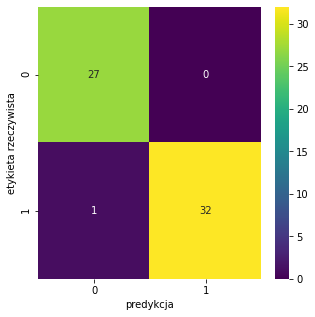

Macierz konfuzji:
[[27  0]
 [ 1 32]]
report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      0.97      0.98        33

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



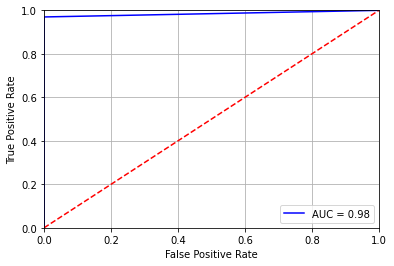

In [6]:
acc = klasyfikacja([3,4,5,6,7])
slownik["Cechy"].append('f0, f1, f2, f3, f4')
slownik["Dokładność"].append(acc)

## Uwzględnienie 2 cech uczących: f0 i formant1

Accuracy: 0.9833


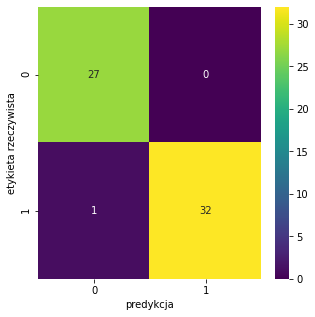

Macierz konfuzji:
[[27  0]
 [ 1 32]]
report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      0.97      0.98        33

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



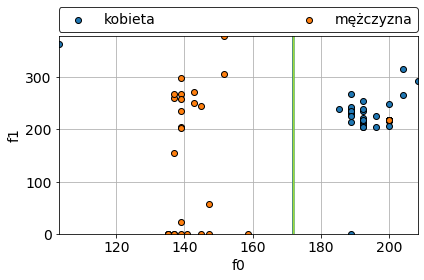

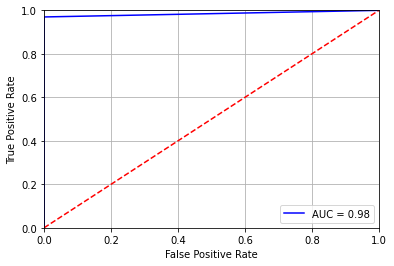

In [7]:
acc = klasyfikacja_granica([3,4], 'f0', 'f1')
slownik["Cechy"].append('f0, f1')
slownik["Dokładność"].append(acc)

## Uwzględnienie 2 cech uczących: f0 i formant2

Accuracy: 0.9833


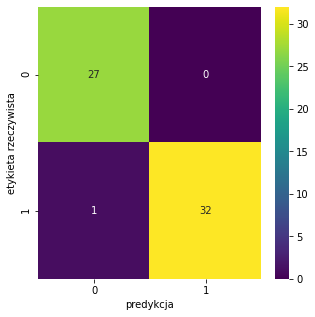

Macierz konfuzji:
[[27  0]
 [ 1 32]]
report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      0.97      0.98        33

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



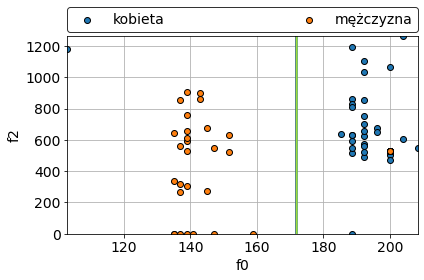

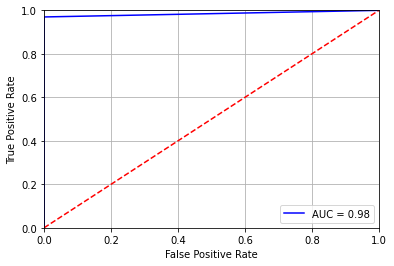

In [8]:
acc = klasyfikacja_granica([3,5], 'f0', 'f2')
slownik["Cechy"].append('f0, f2')
slownik["Dokładność"].append(acc)

## Uwzględnienie 2 cech uczących: f0 i formant3

Accuracy: 0.9833


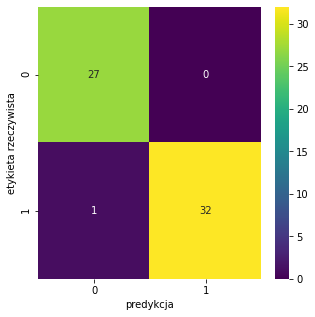

Macierz konfuzji:
[[27  0]
 [ 1 32]]
report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      0.97      0.98        33

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



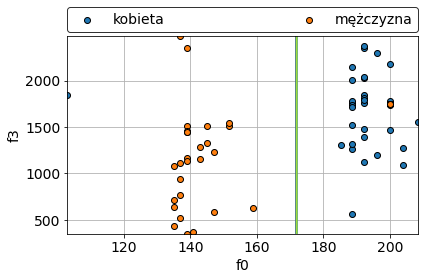

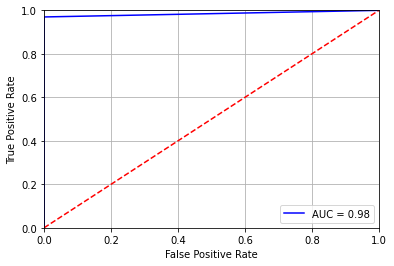

In [9]:
acc = klasyfikacja_granica([3,6], 'f0', 'f3')
slownik["Cechy"].append('f0, f3')
slownik["Dokładność"].append(acc)

## Uwzględnienie 2 cech uczących: f0 i formant4

Accuracy: 0.9833


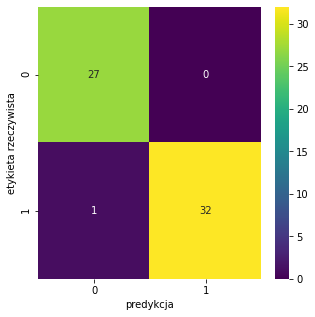

Macierz konfuzji:
[[27  0]
 [ 1 32]]
report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      0.97      0.98        33

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



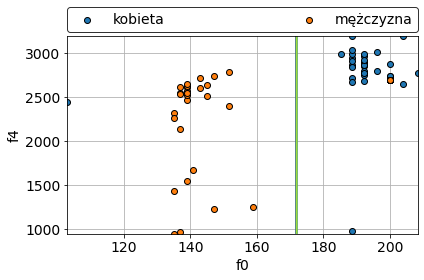

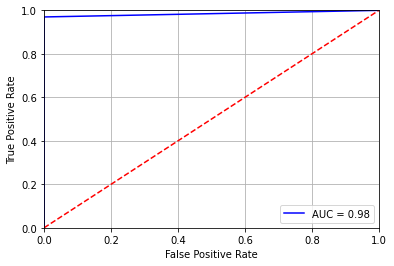

In [10]:
acc = klasyfikacja_granica([3,7], 'f0', 'f4')
slownik["Cechy"].append('f0, f4')
slownik["Dokładność"].append(acc)

## Uwzględnienie 2 cech uczących: formant1 i formant2

Accuracy: 0.7167


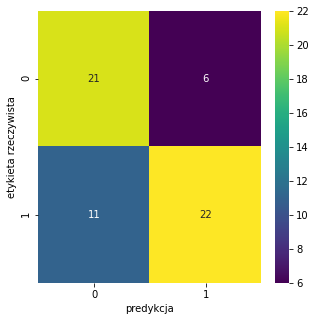

Macierz konfuzji:
[[21  6]
 [11 22]]
report
              precision    recall  f1-score   support

           0       0.66      0.78      0.71        27
           1       0.79      0.67      0.72        33

    accuracy                           0.72        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.73      0.72      0.72        60



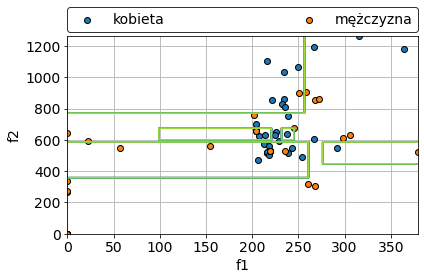

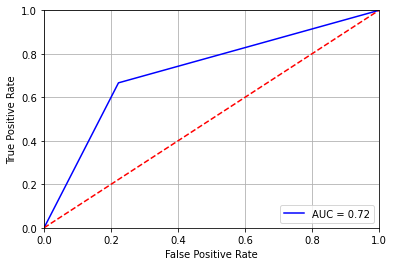

In [11]:
acc = klasyfikacja_granica([4,5], 'f1', 'f2')
slownik["Cechy"].append('f1, f2')
slownik["Dokładność"].append(acc)

## Uwzględnienie 2 cech uczących: formant1 i formant3

Accuracy: 0.7667


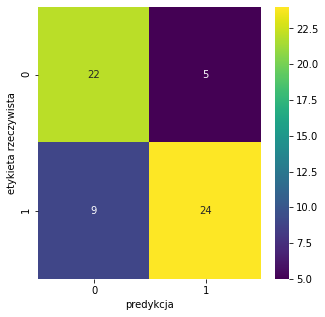

Macierz konfuzji:
[[22  5]
 [ 9 24]]
report
              precision    recall  f1-score   support

           0       0.71      0.81      0.76        27
           1       0.83      0.73      0.77        33

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



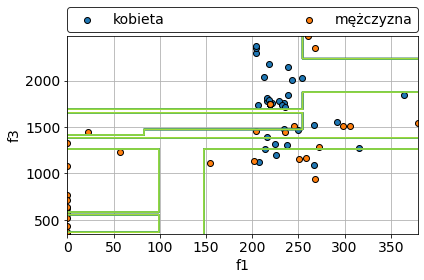

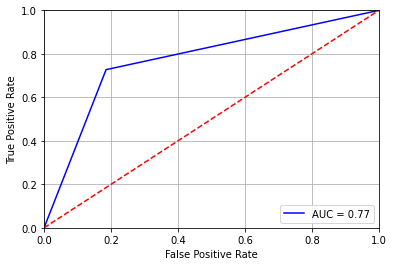

In [12]:
acc = klasyfikacja_granica([4,6], 'f1', 'f3')
slownik["Cechy"].append('f1, f3')
slownik["Dokładność"].append(acc)

## Uwzględnienie 2 cech uczących: formant1 i formant4

Accuracy: 0.8167


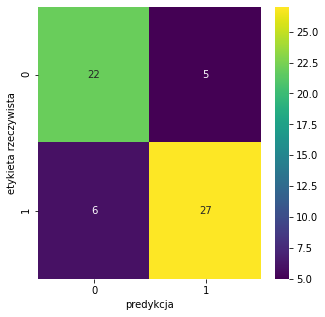

Macierz konfuzji:
[[22  5]
 [ 6 27]]
report
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        27
           1       0.84      0.82      0.83        33

    accuracy                           0.82        60
   macro avg       0.81      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



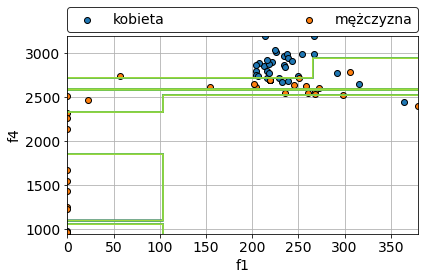

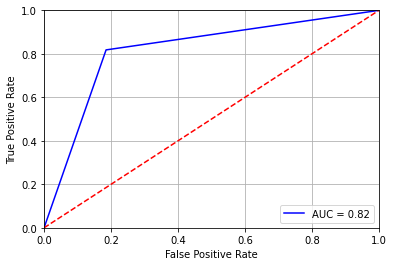

In [13]:
acc = klasyfikacja_granica([4,7], 'f1', 'f4')
slownik["Cechy"].append('f1, f4')
slownik["Dokładność"].append(acc)

## Uwzględnienie 2 cech uczących: formant2 i formant3

Accuracy: 0.7333


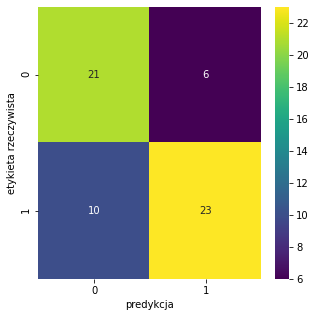

Macierz konfuzji:
[[21  6]
 [10 23]]
report
              precision    recall  f1-score   support

           0       0.68      0.78      0.72        27
           1       0.79      0.70      0.74        33

    accuracy                           0.73        60
   macro avg       0.74      0.74      0.73        60
weighted avg       0.74      0.73      0.73        60



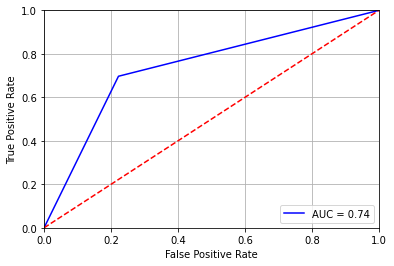

In [14]:
# klasyfikacja_granica
acc = klasyfikacja([5,6])
slownik["Cechy"].append('f2, f3')
slownik["Dokładność"].append(acc)

## Uwzględnienie 2 cech uczących: formant2 i formant4

Accuracy: 0.7167


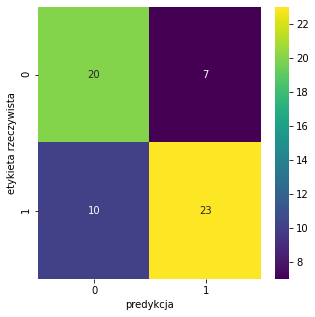

Macierz konfuzji:
[[20  7]
 [10 23]]
report
              precision    recall  f1-score   support

           0       0.67      0.74      0.70        27
           1       0.77      0.70      0.73        33

    accuracy                           0.72        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.72      0.72      0.72        60



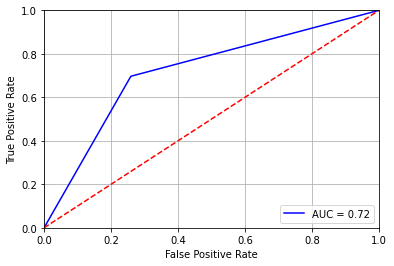

In [15]:
acc = klasyfikacja([5,7])
slownik["Cechy"].append('f2, f4')
slownik["Dokładność"].append(acc)

## Uwzględnienie 2 cech uczących: formant3 i formant4

Accuracy: 0.7667


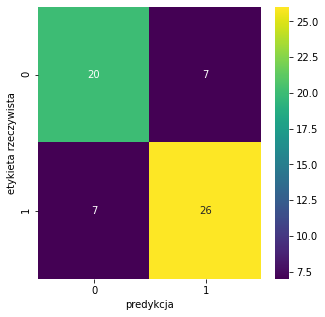

Macierz konfuzji:
[[20  7]
 [ 7 26]]
report
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        27
           1       0.79      0.79      0.79        33

    accuracy                           0.77        60
   macro avg       0.76      0.76      0.76        60
weighted avg       0.77      0.77      0.77        60



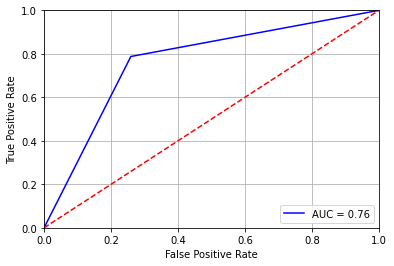

In [16]:
acc = klasyfikacja([6,7])
slownik["Cechy"].append('f3, f4')
slownik["Dokładność"].append(acc)

## Wnioski
Najwyższą dokładność klasyfikacji (98.3%) uzyskano po nauczeniu klasyfikatora Decision Tree z pełnym zbiorem cech, czyli f0, formant1, formant2, formant3, formant4 oraz z dwoma cechami, z których jedna była f0, a druga dowolnie wybranym formantem

In [17]:
tabela = pd.DataFrame.from_dict(slownik)
print(tabela)

                 Cechy  Dokładność
0   f0, f1, f2, f3, f4    0.983333
1               f0, f1    0.983333
2               f0, f2    0.983333
3               f0, f3    0.983333
4               f0, f4    0.983333
5               f1, f2    0.716667
6               f1, f3    0.766667
7               f1, f4    0.816667
8               f2, f3    0.733333
9               f2, f4    0.716667
10              f3, f4    0.766667


Powyżej przedstawiono dokładności dla różnych zestawów cech uczących. Oprócz cechy f0, najwyższą dokładność otrzymano dla formantu 1 i formantu 4 (81.7 %)